# Projet Télédétection : Landes de Bretagne

## Partie 1 : Visualisation des échantillons

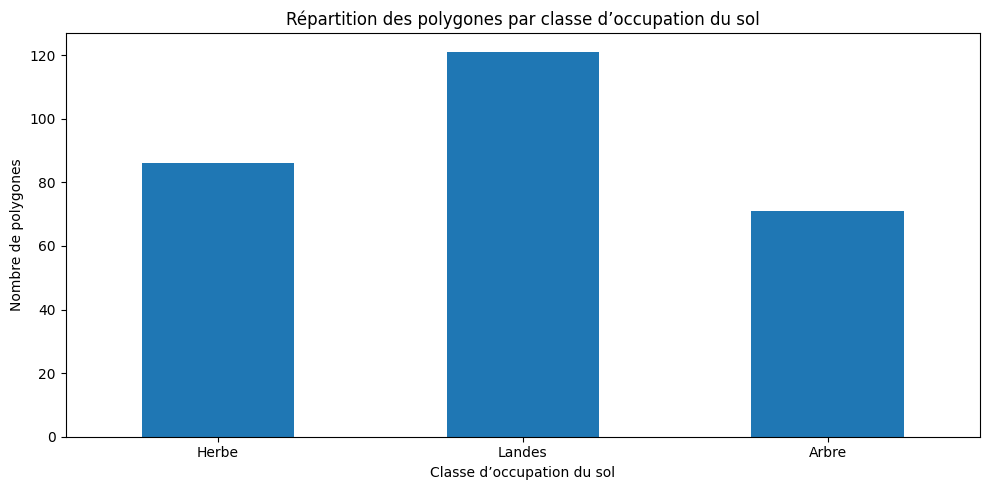

In [42]:
# Initialiser le dossier results/figure/
# Rasteriser le fichier des échantillons avec la valeur de "strate" comme valeur de pixel
# Afficher le diagramme en s'aidant de la Fig. 13 du TD "Visualisation Données"

# --- Nombre de polygones par classe ---

import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file("../data/projet_eval/PI_strates_bretagne_32630.shp")   #Chargement en gdf pour le plot

classe = "strate"
counts = gdf[classe].value_counts().sort_index()    #comptage

#dictionnaire de correspondance code / classe pour les étiquettes
labels_strates = {  
    1: "Sol nu",
    2: "Herbe",
    3: "Landes",
    4: "Arbre"
}

#Remplacer les codes par les noms
counts.index = counts.index.map(labels_strates)

plt.figure(figsize=(10, 5))
counts.plot(kind="bar")

plt.xlabel("Classe d’occupation du sol")
plt.ylabel("Nombre de polygones")
plt.title("Répartition des polygones par classe d’occupation du sol")
plt.xticks(rotation=0)  #étiquettes horizontales

plt.tight_layout()
plt.show()

0...10...20...30...40...50...60...70...80...90...100 - done.


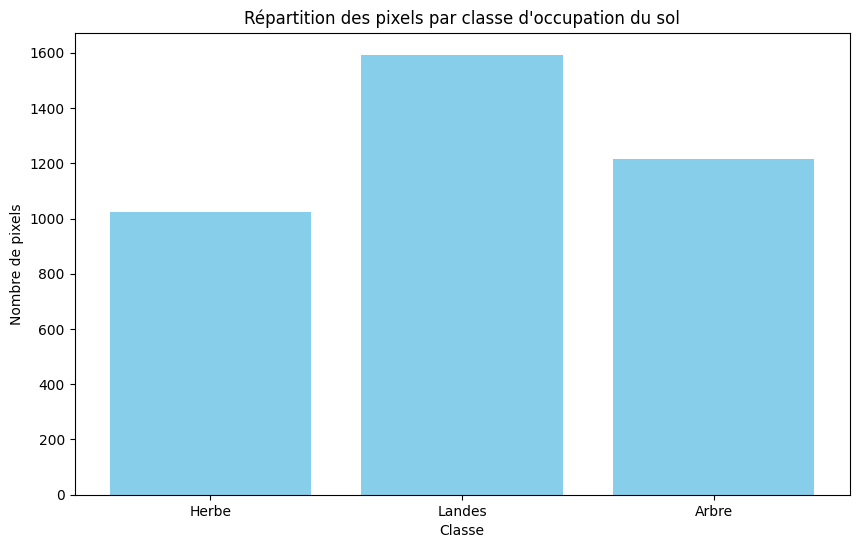

In [107]:
import os
from osgeo import gdal
import sys
from my_function import rasterization   #Appel fonction
import numpy as np
import matplotlib.pyplot as plt

# sys.path.append('/home/onyxia/work')

# --- Nombre de pixels par classe ---

# Rasterisation
# Définition des paramètres
field_name = "strate"
sptial_resolution = 10
in_vector = "../data/projet_eval/PI_strates_bretagne_32630.shp"
out_image = "PI_strates_bretagne_32630.tif"

rasterization(in_vector, out_image, field_name, sptial_resolution)

# Comptage
# Ouvrir le raster
dataset = gdal.Open(out_image)

band = dataset.GetRasterBand(1)
data = band.ReadAsArray()

values, counts = np.unique(data, return_counts=True)

# Filtrer la classe 0 qui correspond à nodata
mask = values != 0
values = values[mask]
counts = counts[mask]

# Remplacer les codes par les noms
labels = [labels_strates.get(val, f"Classe {val}") for val in values]

# Réalisation du barplot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel("Classe")
plt.ylabel("Nombre de pixels")
plt.title("Répartition des pixels par classe d'occupation du sol")
plt.show()
